In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# install apyori package
#!pip install apyori

In [3]:
from apyori import apriori

In [4]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(7501, 20)

#### DataPreprocessing - 


In [6]:
# x = x[~numpy.isnan(x)]

In [7]:
# for i in range(7501):
#     transaction[i]= [i for i in transaction[i] if i != 'nan'] 
    
# transaction

In [8]:
transaction = []
for i in range(7501):
    transaction.append([str(df.values[i,j]) for j in range(20)])

for i in range(7501):
    transaction[i]= [i for i in transaction[i] if i != 'nan'] 
transaction = np.array(transaction)

In [9]:
print(transaction.shape)
print('*****'*3)
print(transaction[0:20])


(7501,)
***************
[list(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'])
 list(['burgers', 'meatballs', 'eggs']) list(['chutney'])
 list(['turkey', 'avocado'])
 list(['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'])
 list(['low fat yogurt']) list(['whole wheat pasta', 'french fries'])
 list(['soup', 'light cream', 'shallot'])
 list(['frozen vegetables', 'spaghetti', 'green tea'])
 list(['french fries']) list(['eggs', 'pet food']) list(['cookies'])
 list(['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'])
 list(['spaghetti', 'champagne', 'cookies'])
 list(['mineral water', 'salmon']) list(['mineral water'])
 list(['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'])
 list(['turkey', 

In [19]:
from wordcloud import WordCloud

In [22]:
text = " ".join(cat for cat in df[0])

Text(0.5, 1.0, 'Most Popular Item Bought')

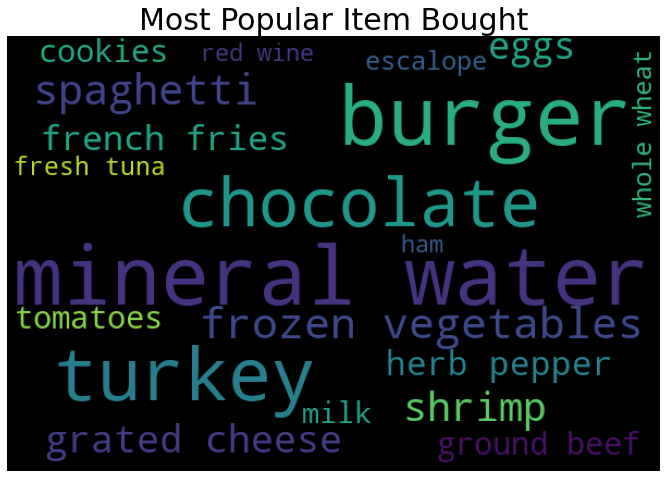

In [23]:
wrdcld = WordCloud(width = 600,height=400,max_words=20).generate(text)
plt.imshow(wrdcld)
plt.axis('off')
plt.title('Most Popular Item Bought',fontsize = 30)

In [ ]:
plt.rcParams['figure.figsize'] = (20,8)
sns.countplot(df[0])
plt.title("Most Popular Items bought by customers", fontsize=35)
plt.xticks(rotation= 90)
plt.show()




### Build Association Rule Mining

In [24]:
transac = list(transaction)
rule = apriori(transac,min_support = 0.01,min_confidence = 0.2,min_lift = 2,min_length = 2)
rule

<generator object apriori at 0x0000023591C46F20>

In [25]:
result = list(rule)
result

[RelationRecord(items=frozenset({'frozen vegetables', 'shrimp'}), support=0.01666444474070124, ordered_statistics=[OrderedStatistic(items_base=frozenset({'shrimp'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23320895522388058, lift=2.44657394843962)]),
 RelationRecord(items=frozenset({'tomatoes', 'frozen vegetables'}), support=0.0161311825089988, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomatoes'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23586744639376217, lift=2.4744639376218323)]),
 RelationRecord(items=frozenset({'ground beef', 'grated cheese'}), support=0.011331822423676844, ordered_statistics=[OrderedStatistic(items_base=frozenset({'grated cheese'}), items_add=frozenset({'ground beef'}), confidence=0.2162849872773537, lift=2.201294015695292)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=fro

In [ ]:
for i in range(0, len(result)):
    print(result[i][0])

In [ ]:
for item in result:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    # second index of the inner list
    print("Support: " + str(item[1]))
    # third index of the list located at 0th position
    # of the third index of the inner list
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-----------------------------------------------------")